**Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.**

Answer:Boosting is an ensemble learning technique in which multiple weak learners are trained sequentially, and each new model focuses on correcting the mistakes made by the previous models. A weak learner is a model that performs only slightly better than random guessing. Boosting improves weak learners by assigning higher importance to misclassified data points so that subsequent models pay more attention to difficult cases. By combining these learners through weighted voting or summation, boosting produces a strong model with significantly improved accuracy and generalization.

**Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

Answer:AdaBoost trains models sequentially by adjusting the weights of training samples, giving more importance to misclassified points. Each new learner focuses on correcting the errors of the previous one using sample reweighting. Gradient Boosting, on the other hand, trains models sequentially by fitting each new model to the residual errors of the previous model using gradient descent optimization. AdaBoost mainly focuses on classification errors, while Gradient Boosting minimizes a loss function directly and can be applied to both regression and classification.

**Question 3: How does regularization help in XGBoost?**

Answer:Regularization in XGBoost helps prevent overfitting by penalizing model complexity. It controls the number of leaves, tree depth, and leaf weights using L1 and L2 regularization terms. By adding a penalty to complex trees, XGBoost encourages simpler models that generalize better to unseen data. This makes XGBoost more robust and stable compared to traditional gradient boosting methods.

**Question 4: Why is CatBoost considered efficient for handling categorical data?**

Answer:CatBoost is efficient for handling categorical data because it can process categorical features directly without requiring extensive preprocessing like one-hot encoding. It uses techniques such as ordered target encoding and permutation-driven learning to avoid target leakage. This results in better performance, reduced overfitting, and faster training, especially when datasets contain many categorical variables.

**Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?**

Answer:Boosting techniques are preferred in applications where high predictive accuracy is critical and complex patterns exist in the data. Examples include credit risk assessment, fraud detection, medical diagnosis, customer churn prediction, recommendation systems, and click-through rate prediction. Boosting is especially useful when handling imbalanced datasets and when reducing bias is more important than reducing variance.

In [1]:
# Question 6: Python program – AdaBoost Classifier on Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train AdaBoost Classifier
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 0.9649122807017544


In [2]:
# Question 7: Python program – Gradient Boosting Regressor on California Housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)


R-squared Score: 0.7756446042829697


In [3]:
# Question 8: Python program – XGBoost Classifier with GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model and parameter grid
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid search
grid = GridSearchCV(xgb, param_grid, cv=5)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:08:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:08:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:09:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:09:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:09:02] WARNING: /w

Best Parameters: {'learning_rate': 0.2}
Accuracy: 0.956140350877193


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


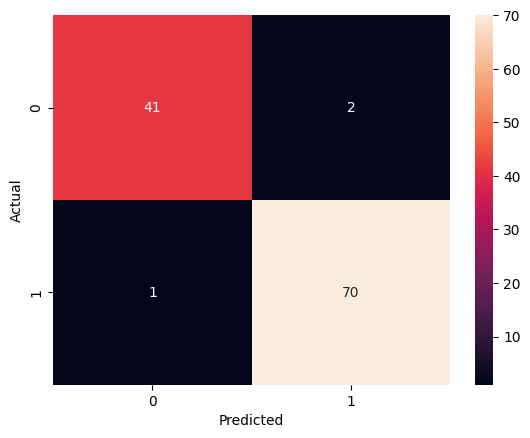

In [5]:
# Question 9: Python program – CatBoost Classifier and Confusion Matrix
# Install CatBoost
!pip install catboost

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train CatBoost Classifier
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Question 10: Boosting-based data science pipeline for loan default prediction**

Answer:First, I would preprocess the data by handling missing values using appropriate imputation techniques such as mean or median for numerical features and mode or model-based imputation for categorical features. Categorical variables would be handled using native categorical support if using CatBoost or appropriate encoding techniques for AdaBoost and XGBoost. Given the imbalanced dataset, I would apply techniques such as class weighting or resampling.

For model selection, I would prefer XGBoost or CatBoost due to their strong performance on structured tabular data and ability to handle missing values and complex feature interactions. Hyperparameter tuning would be performed using GridSearchCV or RandomizedSearchCV focusing on parameters such as learning rate, depth, and number of estimators.

Evaluation would be done using metrics like precision, recall, F1-score, and ROC-AUC instead of accuracy because the dataset is imbalanced and false negatives are costly in loan default prediction. Ensemble boosting improves business outcomes by reducing financial risk, improving default detection accuracy, and enabling better credit decision-making.